In [1]:
import random
import numpy as np
import pandas as pd
from scipy.stats import t
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Bedrooms = [1,1,1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,5,5,6]
Prices = [120,133,139,185,148,160,192,205,244,213,236,280,275,273,312,311,304,415,396,488]

* Extract a random sample of size 10

In [4]:
df_Rooms = pd.DataFrame({'Bedrooms':Bedrooms, 'Prices':Prices})
df_Rooms

,Bedrooms,Prices
0,1,120
1,1,133
2,1,139
3,2,185
4,2,148
5,2,160
6,2,192
7,3,205
8,3,244
9,3,213


In [4]:
sample_df = df_Rooms.sample(10)
sample_df

,Bedrooms,Prices
13,3,273
12,3,275
8,3,244
17,5,415
11,3,280
5,2,160
9,3,213
0,1,120
1,1,133
18,5,396


* Compute the mean and standard deviation of the sample

In [22]:
bed_sample_Mean = sample_df['Bedrooms'].mean()
price_sample_Mean = sample_df['Prices'].mean()
print("The mean of the Bedrooms and Prices sample are %.2f and %.2f respectively."%(bed_sample_Mean, price_sample_Mean))
bed_sample_Std = sample_df['Bedrooms'].std()
price_sample_Std = sample_df['Prices'].std()
print("The standard deviation of the Bedrooms and Prices sample are %.2f and %.2f respectively."%(bed_sample_Std, price_sample_Std))

The mean of the Bedrooms and Prices sample are 2.90 and 255.20 respectively.
The standard deviation of the Bedrooms and Prices sample are 1.73 and 125.71 respectively.


* Compute the the mean of the population

In [23]:
bedroom_Mean = df_Rooms['Bedrooms'].mean()
price_Mean = df_Rooms['Prices'].mean()
print("The mean of the Bedrooms and Prices population are %.2f and %.2f respectively."%(bedroom_Mean, price_Mean))

The mean of the Bedrooms and Prices population are 3.00 and 251.45 respectively.


* Compute the confidence interval of 95% using the sample 
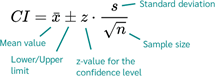

In [25]:
n = len(Bedrooms)
confidence_level = 0.95
# t.ppf() function,  find the critical value that corresponds to a confidence level 
# defult  loc=mean=0, scale=std_dev=1 , (df=n-1 then it's z_value)
z_value = norm.ppf((1 + confidence_level) / 2).round(2)
margin_Err = z_value * (df_Rooms['Bedrooms'].std() / math.sqrt(len(df_Rooms['Bedrooms'])))
lower_band_CI_B = bed_sample_Mean - margin_Err
upper_band_CI_B = bed_sample_Mean + margin_Err
print('Z_value is : ', z_value)
print(f"95% confidence interval for Bedrooms : [{lower_band_CI_B:.4f}, {upper_band_CI_B:.4f}]")

# ===============================================================================

margin_Err = z_value * (df_Rooms['Prices'].std() / math.sqrt(len(df_Rooms['Prices'])))
lower_band_CI_P = price_sample_Mean - margin_Err
upper_band_CI_P = price_sample_Mean + margin_Err
print(f"95% confidence interval for price : [{lower_band_CI_P:.4f}, {upper_band_CI_P:.4f}]")

Z_value is :  1.96
95% confidence interval for Bedrooms : [2.2967, 3.5033]
95% confidence interval for price : [211.3377, 299.0623]


* Check if the population mean lies between the upper and lower bounds of the interval

In [26]:
print(f"population mean for Bedrooms is {bedroom_Mean:.2f} and confidence interval is [{lower_band_CI_B:.4f}, {upper_band_CI_B:.4f}]")
print(f"population mean for Prices is {price_Mean:.2f} and confidence interval is [{lower_band_CI_P:.4f}, {upper_band_CI_P:.4f}]")

population mean for Bedrooms is 3.00 and confidence interval is [2.2967, 3.5033]
population mean for Prices is 251.45 and confidence interval is [211.3377, 299.0623]


* Using both of the Bedrooms and the Prices:
* Compute the covariance and the correlation between the two variables

In [27]:
df_Rooms.cov()

,Bedrooms,Prices
Bedrooms,1.894737,133.894737
Prices,133.894737,10016.155263


In [28]:
df_Rooms.corr()

,Bedrooms,Prices
Bedrooms,1.000000,0.971938
Prices,0.971938,1.000000


<AxesSubplot: >

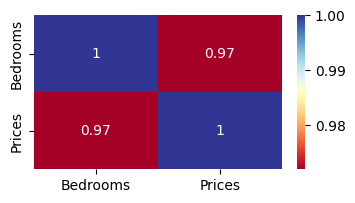

In [12]:
plt.figure(figsize=(4,2))
sns.heatmap(df_Rooms.corr(), annot=True, cmap="RdYlBu")

* Build a regression model and estimate the regression parameters (slope and intercept).

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(df_Rooms['Bedrooms']).reshape(-1, 1)
y = df_Rooms['Prices']
model.fit(x, y)
print("Intercept is : %.2f"%model.intercept_.round(2))
print("Slope is : %.2f "%model.coef_[0].round(2))

Intercept is : 39.45
Slope is : 70.67 


Text(0.5, 1.0, 'Linear Regression')

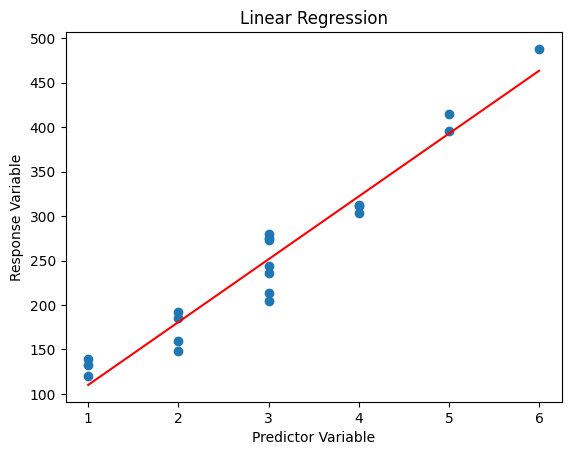

In [40]:
plt.scatter(x,y)
y_hat = model.predict(x)
plt.plot(x, y_hat,color='red')
plt.xlabel('Predictor Variable')
plt.ylabel('Response Variable')
plt.title('Linear Regression')

* Predict the house price for a house with 7 rooms

In [42]:
x_New = 7
y_pred = model.predict(np.array(x_New).reshape(-1,1)).round(2)[0]
print("Predicted value for 7 bedrooms is : ", y_pred)

Predicted value for 7 bedrooms is :  534.12


* Estimate the upper bound and the lower bounds of the prediction interval of a house with 7 rooms
* Alpha = 0.1
* N = 20
* Df = N-2
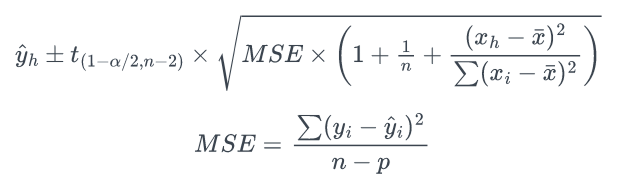
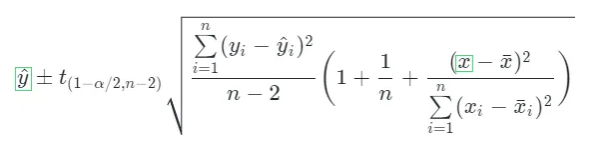

In [51]:
alpha = 0.1
N = 20
dof = N - 2
t_value = t.ppf(1-alpha/2, dof)
MSE = ((y-y_hat)**2)/dof
st_Err = np.sqrt(1+(1/N)+(((x_New- x.mean())**2)/(((x-x.mean())**2).sum())))
print(f"The t-value for alpha = {alpha} and N = 20 is {t_value}")
interval = t_value * st_Err
lower_band_PI_7 = y_pred - interval
upper_band_PI_7 = y_pred + interval
print(f"95% prediction interval for price : [{lower_band_PI_7:.4f}, {upper_band_PI_7:.4f}]")

The t-value for alpha = 0.1 and N = 20 is 1.7340636066175354
95% prediction interval for price : [532.0002, 536.2398]


* Using as sample of houses that have only 3 bedrooms 
* Try to find the lower price that can be payed for a house with 3 rooms using Tolerance interval
* Try  to find the highest price that can be payed for a house with 3 rooms using Tolerance interval
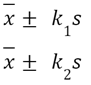